In [2]:
%load_ext cython
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Laplace Floodfill

### Fill in Circle

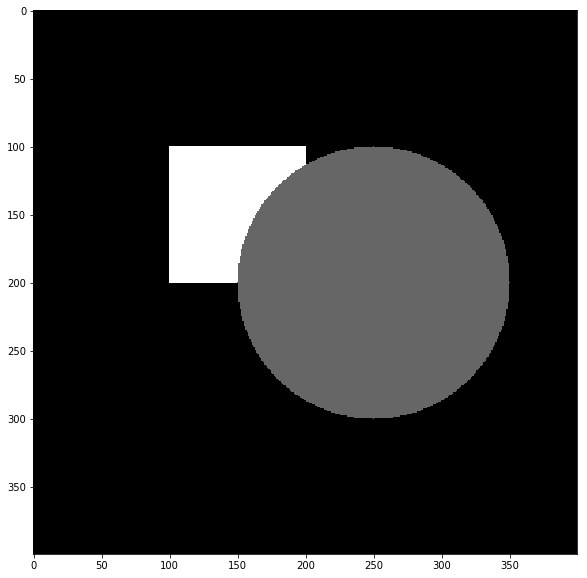

In [40]:
# Create a blank frame
frame = np.zeros(shape=(400,400)).astype(np.uint8)

# Draw a square
cv2.rectangle(frame, pt1=(100,100), pt2=(200,200), color=250, thickness=-1)

# Draw a circle
cv2.circle(frame, center=(250,200), radius=100, color=100, thickness=-1)

# Save a copy for plotting
original_frame = frame.copy()
    
# Plot
plt.figure(figsize=(10,10))
plt.imshow(original_frame, cmap='gray')

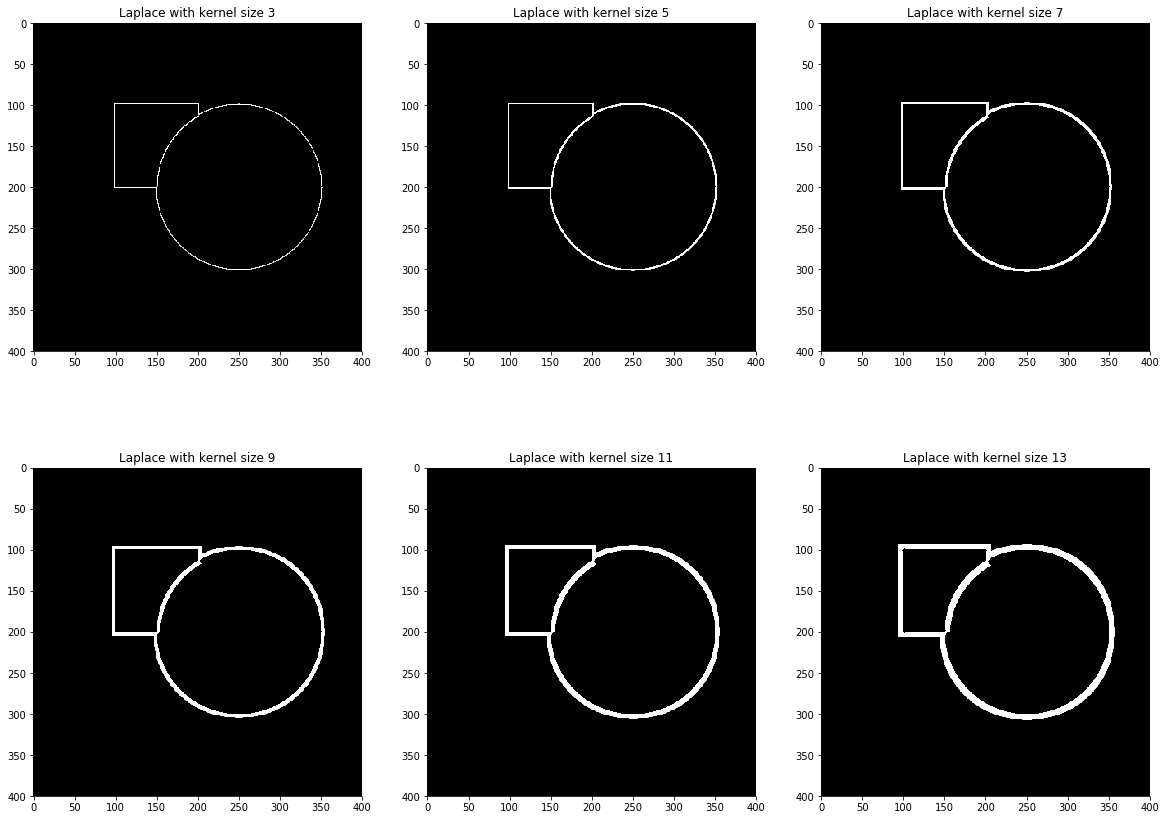

In [41]:
# Apply laplace
plt.figure(figsize=(20,15))
plot_index = 1
rows, cols = 2,3
for ksize in [3,5,7,9,11,13]:
    # Apply Laplace
    laplace = cv2.Laplacian(frame, ddepth=0, ksize=ksize)
    plt.subplot(rows, cols, plot_index)
    plt.title('Laplace with kernel size {}'.format(ksize))
    plt.imshow(laplace, 'gray')
    plot_index += 1

### Flood Fill Implementation
Implemented with cython as the pure python implementation sometimes took minutes

In [3]:
%%cython 
import numpy as np
cimport numpy as np 

def flood_fill(frame, pt0, threshold=100):
    # Points to visit
    Q       = [(pt0[1],pt0[0])]
    # Points that have been visited
    cdef np.ndarray visited = np.zeros(shape=frame.shape)
    # Output
    cdef np.ndarray out = np.zeros(shape=frame.shape)
    
    while len(Q):
        pty, ptx = Q.pop(0)
        
        # Check if the point is out of the image boundaries
        if ptx < 0 or pty < 0:
            continue
        if ptx > frame.shape[1] or pty > frame.shape[0]:
            continue
            
        # Check if the point has been visited
        if visited[pty, ptx] == 1:
            continue
            
        # Check if the value at the point is greater than the threshold
        if frame[pty, ptx] > threshold:
            continue
            
        # Updated visited, output, and Q
        visited[pty, ptx] = 1
        out[pty, ptx] = 255
        Q += [
            (pty-1,ptx), (pty,ptx-1), (pty+1,ptx), (pty,ptx+1)
        ]
        
    return out

CPU times: user 550 ms, sys: 0 ns, total: 550 ms
Wall time: 540 ms


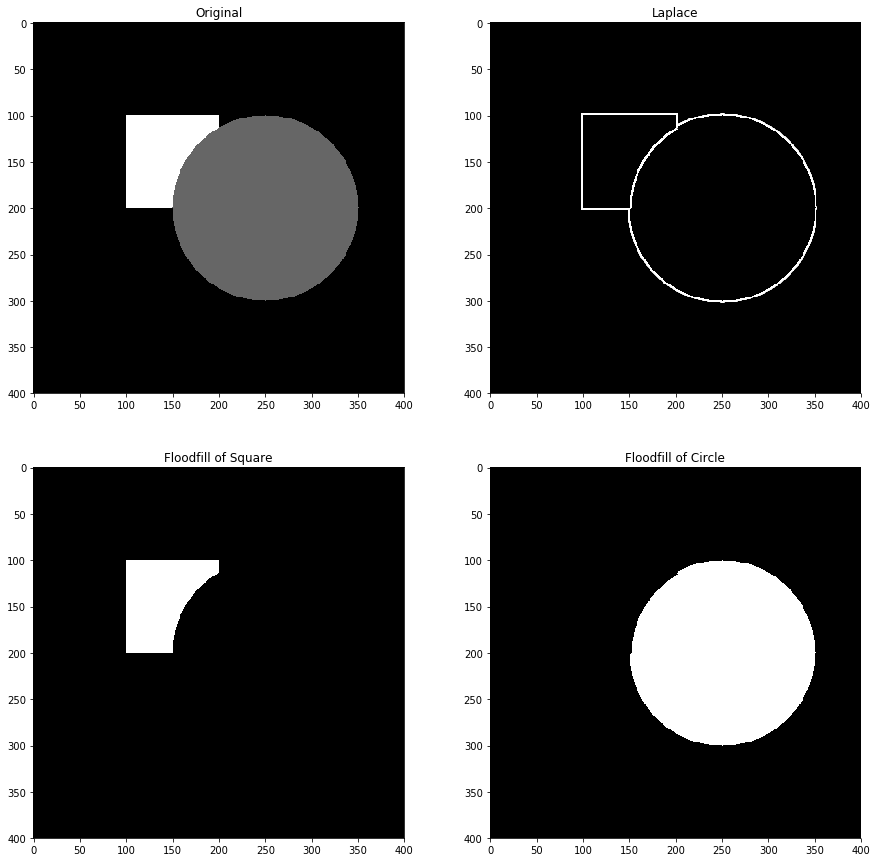

In [141]:
%%time
laplace = cv2.Laplacian(frame, ddepth=0, ksize=5)
square_fill = flood_fill(frame=laplace, pt0=(150,150))
circle_fill = flood_fill(frame=laplace, pt0=(250,200))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Original')
plt.imshow(frame, 'gray')
plt.subplot(222)
plt.title('Laplace')
plt.imshow(laplace, 'gray')
plt.subplot(223)
plt.title('Floodfill of Square')
plt.imshow(square_fill, 'gray')
plt.subplot(224)
plt.title('Floodfill of Circle')
plt.imshow(circle_fill, 'gray')